### Overview

In this notebook we will analyze the historical temperatures of NYC. Our data contains the average high, average low, record high, and record low of every calendar date.

In [3]:
import pandas as pd
import csv

df = pd.read_csv('./NYC_TemperatureData.csv')
df

,Date,avgLow,avgHigh,recLow,recLowYear,recHigh,recHighYear
0,1-Jan,24,38,10,1963,59,1966
1,2-Jan,24,38,6,1968,58,1966
2,3-Jan,24,37,3,1981,56,1950
3,4-Jan,24,37,1,1981,64,1950
4,5-Jan,24,37,1,1981,60,1950
...,...,...,...,...,...,...,...
361,27-Dec,25,39,5,1948,60,1973
362,28-Dec,25,39,7,1950,64,1982
363,29-Dec,25,38,8,1993,67,1984
364,30-Dec,25,38,2,1962,59,1984


In [4]:
temp_data = df.to_numpy()

temp_data

array([['1-Jan', 24, 38, ..., 1963, 59, 1966],
       ['2-Jan', 24, 38, ..., 1968, 58, 1966],
       ['3-Jan', 24, 37, ..., 1981, 56, 1950],
       ...,
       ['29-Dec', 25, 38, ..., 1993, 67, 1984],
       ['30-Dec', 25, 38, ..., 1962, 59, 1984],
       ['31-Dec', 24, 38, ..., 1962, 61, 1965]], dtype=object)

In [5]:
##output the first element of the `temp_data` 2-D list. 
temp_data[1]

array(['2-Jan', 24, 38, 6, 1968, 58, 1966], dtype=object)

#### Access a specific element/row

In [6]:
temp_data[1, 1]

24

In [7]:
temp_data[:, 3]
##this is the record low of each day

array([10, 6, 3, 1, 1, 3, 5, 0, 0, 0, 0, 1, 3, 5, 0, 1, 0, 0, 1, -4, 2, 2,
       1, 4, 4, 8, 4, 4, 1, 7, 6, 4, -2, 1, 4, 2, 3, 5, 2, 4, 0, -3, 0, 0,
       0, 0, 2, -3, -1, 10, 5, 5, 8, 10, 16, 13, 10, 9, 11, 7, 5, 10, 10,
       11, 12, 16, 9, 9, 10, 10, 12, 12, 19, 19, 17, 15, 13, 5, 16, 15,
       12, 14, 19, 23, 18, 20, 24, 20, 25, 22, 20, 26, 29, 22, 23, 22, 21,
       18, 21, 25, 26, 27, 26, 28, 21, 27, 26, 28, 36, 31, 33, 20, 27, 30,
       38, 33, 33, 32, 38, 37, 40, 36, 34, 38, 38, 40, 41, 36, 36, 36, 34,
       40, 39, 38, 41, 41, 40, 38, 38, 38, 41, 41, 47, 44, 41, 40, 44, 41,
       39, 46, 44, 48, 46, 49, 46, 48, 50, 50, 46, 48, 44, 49, 44, 44, 50,
       49, 51, 50, 50, 46, 52, 49, 55, 53, 54, 53, 48, 46, 50, 50, 57, 56,
       54, 56, 56, 53, 49, 49, 53, 57, 54, 50, 59, 55, 57, 61, 58, 59, 58,
       61, 60, 57, 58, 57, 62, 58, 57, 60, 55, 59, 60, 60, 57, 59, 59, 54,
       57, 56, 54, 57, 54, 55, 56, 55, 50, 51, 53, 54, 52, 50, 54, 56, 53,
       50, 55, 53, 53, 52, 54

#### Diagonal

A loop that prints out the diagonal elements of the matrix.

In [8]:
i = 0
tempLength = len(temp_data[1])
while i < tempLength:
    print(temp_data[i,i])
    i+=1

1-Jan
24
37
1
1981
60
1961


#### Analyzing the Data


Print out the *average* of the *average high* temperatures in May and September.

In [9]:
mayTemp = 0
sepTemp = 0

for i in range(0, len(temp_data)):
    date = temp_data[i, 0]
    month = date[len(date)-3: ]
    if month == 'May':
        mayTemp += temp_data[i, 2]
    elif month == 'Sep':
        sepTemp += temp_data[i, 2]
        
avgTotal = (mayTemp + sepTemp)/61
print(f'The average of the high temps in May was {mayTemp/31}')
print(f'The average of the high temps in September was {sepTemp/30}')

The average of the high temps in May was 68.38709677419355
The average of the high temps in September was 73.9


#### Record Highs and Lows

Print out the full date which had the highest temperature in our data, and the date which had the lowest recorded temperature in the data.

In [10]:
recordLow = 999999
lowDate = ''
lowYear = ''
recordHigh = -999999
highDate = ''
highYear = ''

for i in range(0, len(temp_data)):
    high = temp_data[i, 5]
    low = temp_data[i, 3]
    date = temp_data[i, 0]
    day = date[-3: ]
    year = temp_data[i, 6]
    if high > recordHigh:
        recordHigh = high
        highDate = date
        highYear = year
    elif low < recordLow:
        recordLow = low
        lowDate = date
        lowYear = year

        
lowMon = lowDate[-3: ]
lowDay = lowDate[0: -4]
highMon = highDate[-3: ]
highDay = highDate[0:-4]

print(f'The record low was {recordLow} on {lowMon} {lowDay}, {lowYear}')
print(f'The record high was {recordHigh} on {highMon} {highDay}, {highYear}')


The record low was -4 on Jan 20, 1996
The record high was 102 on Jul 3, 1966


### Weather Analysis - Szeged, Hungary

I have provided a data set from this site which includes hourly weather data from Szeged, Hungary. https://www.kaggle.com/datasets/muthuj7/weather-dataset/discussion/219899?resource=download

In [11]:
##preview of data
df = pd.read_csv('./weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Difference,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,-2.083333,0.89,14.1197,251,15.8263,0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,-2.127778,0.86,14.2646,259,15.8263,0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.000000,0.89,3.9284,204,14.9569,0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,-2.344444,0.83,14.1036,269,15.8263,0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,-1.777778,0.83,11.0446,259,15.8263,0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5610,2006-03-29 19:00:00.000 +0200,Breezy and Partly Cloudy,rain,11.061111,11.061111,0.000000,0.57,36.3377,281,11.2700,0,1009.42,Partly cloudy throughout the day and breezy st...
5611,2006-03-29 20:00:00.000 +0200,Partly Cloudy,rain,10.816667,10.816667,0.000000,0.58,25.9693,287,11.0768,0,1010.63,Partly cloudy throughout the day and breezy st...
5612,2006-03-29 21:00:00.000 +0200,Breezy and Mostly Cloudy,rain,9.950000,6.350000,-3.600000,0.62,32.6669,281,10.0464,0,1011.34,Partly cloudy throughout the day and breezy st...
5613,2006-03-29 22:00:00.000 +0200,Breezy and Partly Cloudy,rain,9.883333,6.372222,-3.511111,0.62,31.0247,290,15.8263,0,1011.94,Partly cloudy throughout the day and breezy st...


This is a **large dataset** with over 5000 hours.

We are going to focus on the numeric data values. We want to see how **Wind Speed** affects the difference between **Apparent Temperature** (commonly known as the "feels like" temperature) and the actual **Temperature** - see the `Difference` column.

In [12]:
hungary_weather_data = df.to_numpy()
hungary_weather_data

## TODO - [One row of data represents the data for one hour]

array([['2006-04-01 00:00:00.000 +0200', 'Partly Cloudy', 'rain', ..., 0,
        1015.13, 'Partly cloudy throughout the day.'],
       ['2006-04-01 01:00:00.000 +0200', 'Partly Cloudy', 'rain', ..., 0,
        1015.63, 'Partly cloudy throughout the day.'],
       ['2006-04-01 02:00:00.000 +0200', 'Mostly Cloudy', 'rain', ..., 0,
        1015.94, 'Partly cloudy throughout the day.'],
       ...,
       ['2006-03-29 21:00:00.000 +0200', 'Breezy and Mostly Cloudy',
        'rain', ..., 0, 1011.34,
        'Partly cloudy throughout the day and breezy starting in the morning continuing until night.'],
       ['2006-03-29 22:00:00.000 +0200', 'Breezy and Partly Cloudy',
        'rain', ..., 0, 1011.94,
        'Partly cloudy throughout the day and breezy starting in the morning continuing until night.'],
       ['2006-03-29 23:00:00.000 +0200', 'Partly Cloudy', 'rain', ..., 0,
        1012.93,
        'Partly cloudy throughout the day and breezy starting in the morning continuing until nigh

We are going to build a [**linear regression model**](https://en.wikipedia.org/wiki/Linear_regression) that takes various data values as inputs, and tries to build a linear relationship between those values and the *output* (y-value), which is Apparent Temperature.

Our model consists of an equation:

$$
\hat{y} = \beta x + \beta_{0}
$$

where we "learn" the best values for $\beta$ and $\beta_{0}$.

This means finding those values which minimized the "Squared error" between the *predicted* and the *actual*.

$$
\text{Minimize: }
(y - \hat{y})^{2}
$$

Some really smart mathematicians figured out that the values for $\beta$ and $\beta_{0}$ that do this are:

$$
\beta = \frac{\sum{x_{i}Y_{i}-\bar{Y}x_{i}}}{\sum{x^{2}_{i}-\bar{x}x_{i}}}
$$

Where $x_{i}$ represents each individual $x$ value in the data, and $\bar{x}$ represents the **average** of all the x-values.

$Y_{i}$ represents each individual $Y$ value in the data, and $\bar{Y}$ represents the **average** of all the x-values.

$\beta_{0}$, the y-intercept, is easier to find:

$$
\beta_{0} = \bar{Y}-\beta \bar{x}
$$

We are going to build this model in multiple steps.

Many data scientists separate their data into **training data** and **testing data**. This means that only a portion of the data is used to actually find the best values for the model. We are going to perform an **80/20** split. 80% of the data will be our training data, and we will use it to figure out those $\beta$ and $\beta_{0}$ values.

Then, we will *test it out* on the other 20% of data.

To get the 80% training data, we want to take 80% of the rows. There are about 96000 rows. Find the exact value we should use as a boundary between training data and testing data.

Once we have found that value, we can use a "slice" of the array and store that in a new variable to represent the training data.

For example, if we find that the first 70,000 rows should represent the training data, we can simply do:

`training_data = hungary_weather_data[:70000]`

`testing_data = hungary_weather_data[70000:]`

**TODO** - Perform this work in the next code block. (Don't use `70000`. Find out what the 80% cutoff is)

In [13]:
eightyPer = 0.8 * len(hungary_weather_data)
eightyPer = int(eightyPer)
training_data = hungary_weather_data[ :eightyPer]
testing_data = hungary_weather_data[eightyPer: ]

Now, let's create 1-D arrays to contain the relevant `x` and `y` values that we will use to train our models.

Make `y_train` the column of all the y-values, which is Difference.

Remember for a 2-D array - to get an entire column, you do:

`training_data[:,0]`

to get the entire first column. (but that's not what we want to do. Figure out which column has **Difference** between apparent and actual temperature)

For the x-value, you choose one of the other categories. Let's see how **wind speed** affects the **Difference**. It is the 8th column in our data, so it exists at index # 7. Create another variable called `x_train` which equals this 1-D Array.

In [14]:
## TODO - Construct 1-D arrays for our x and y values.
y_train = training_data[:, 5]
x_train = training_data[:, 7]

#### Training the Model

Now that we have X and Y Values, we can calculate the values dictated by the formulas above.
It probably makes sense to calculate the **averages** first. Make those variables called `y_bar` and `x_bar`.

In [15]:
# TODO - calculate the average of the x and y values.
y_bar = sum(y_train)/len(y_train)
x_bar = sum(x_train)/len(x_train)


Next, let's use those values in the formulas we wrote above. I will display them again:

$$
\beta = \frac{\sum{x_{i}Y_{i}-\bar{Y}x_{i}}}{\sum{x^{2}_{i}-\bar{x}x_{i}}}
$$

and

$$
\beta_{0} = \bar{Y}-\beta \bar{x}
$$

**TODO**

In the next block of code, write code to calculate $\beta$ based on our training data.

In [16]:
# TODO - Calculate Beta by looping through the data and summing up the values relevant to our formula
num = 0
dem = 0
for i in range(0, len(x_train)):
    num = num + (x_train[i]*y_train[i] - y_bar * x_train[i])
    dem = dem + ((x_train[i] ** 2) - (x_bar * x_train[i]))

B = num/dem
B

-0.14636865092873166

Now, calculate $\beta_{0}$, using the data averages and the $\beta$ we just calculated.

In [17]:
# TODO - calculate the intercept
B0 = y_bar - (B*x_bar)
B0

0.0949942716664911

#### Calculating the Regression Line and Plotting it

You just performed your first linear regression! We now have all the pieces to construct a line, `y=mx+b`, just like algebra class. More specifically, our line is:

$$
y = \beta x + \beta_{0}
$$

Let's see how this line *looks* across our training data set by calculating all of those specific y-values. Simply multiply every value in `x_train` by $\beta$ and add the intercept.

In [18]:
predicted_y = B * x_train + B0

Let's plot two series using `matplotlib`. We want this to be a scatterplot, so instead of `plt.plot()`, use `plt.scatter(...)`. Both series will have `x_train` as the first input.

One series will have the *actual* values, `y_train`, and the other series will have your `predicted_y` from the previous plot. Do you notice a large difference?

Remember that you can put different series on the same plot just with consecutive `plt.scatter(...)` lines.

Note that you can also put the argument `s=8`, or some other number, at the end of the function call (so within `plt.scatter(...)`) to adjust the size of the scatter markers. I suggest making them small so that you can see all of the points clearly.

Please also put axes and title on the plot. Make sure that you give the series different colors so that you can differentiate them.

In [19]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

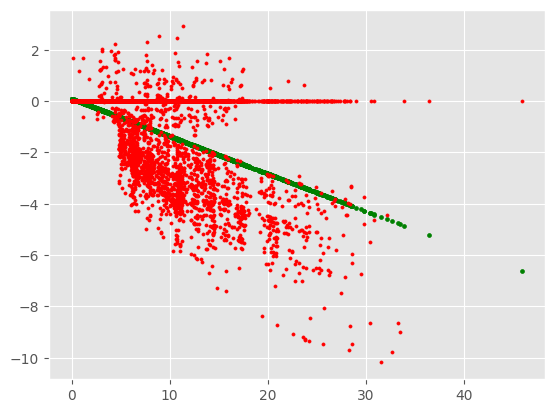

In [20]:
plt.scatter(x_train, predicted_y, c = 'green', s = 8)
plt.scatter(x_train, y_train, c = 'red', s = 5)